## Monte Carlo simulation
Imagine you are asked to estimate the average distance between randomly placed points within a unit square (see figure below). Describe the python workflow that you would use to estimate the average distance between two randomly placed points within the unit square

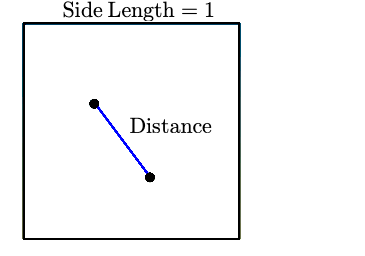

### 1) Construct the Unit Square Domain and populate with random particles:

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Number of particles
n = 6

# Randon number for the particle positions
numbers = np.random.rand(2*n)
#print(numbers)

# Define particle coordinates
particles = numbers.reshape(n,2)
#print(particles)

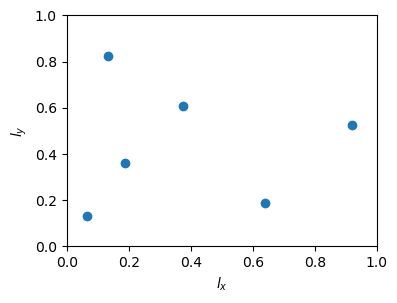

In [5]:
# Define the domain
plt.figure(figsize=(4,3))

plt.scatter(particles[:, 0],particles[:, 1])

plt.xlim(0., 1.)
plt.ylim(0., 1.)
plt.xlabel(r"$l_x$")
plt.ylabel(r"$l_y$")
plt.show()

### 2) Estimate distances (only for consecutive particles):

### 3) Average distance considering particles at random positions

### 4) Aggregate the results and study convergence

### Convergence plot